<a href="https://colab.research.google.com/github/Teegee2000/cardiovascular-disease-predictions-leveraging-supervised-and-ensemble-machine-learning-models/blob/main/cardiovascular_disease_(mendeley_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd ## it allows loading of dataset
import numpy as np ## incase i need to work with array
import matplotlib.pyplot as plt ## for visualization
import seaborn as sns ## for visualization ## built from matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve, auc

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
## for the primary data from mendeley
df_file_path='/content/drive/MyDrive/Cardiovascular_Disease_Dataset.csv'

df=pd.read_csv(df_file_path)## loading the dataset

In [51]:
df.head(5)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [52]:
df.shape

(1000, 14)

In [53]:
 df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [54]:
df.isna().sum() # finding any missing value

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


Visualization

In [55]:
age_count=df['age'].value_counts()
print(age_count)

age
20    28
58    23
24    22
76    22
46    21
      ..
65    11
68    11
41    11
60    11
49    10
Name: count, Length: 61, dtype: int64


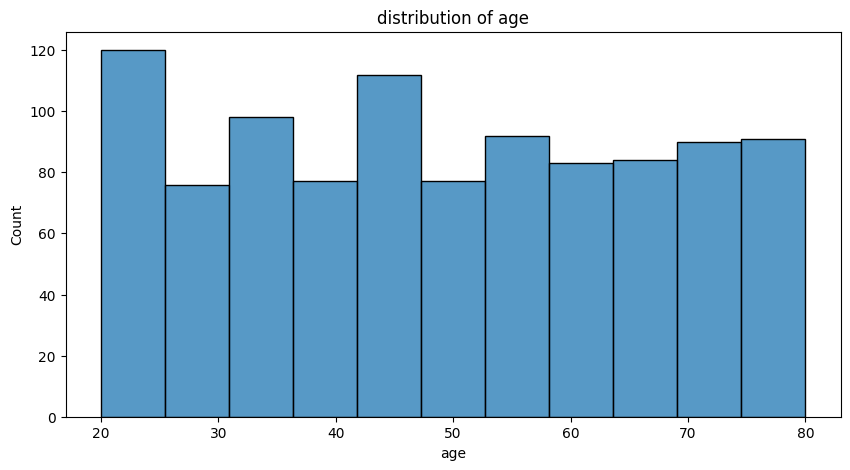

In [56]:
# distribution of age
plt.figure(figsize=(10,5))
sns.histplot(df['age'])
plt.title('distribution of age')
plt.show()

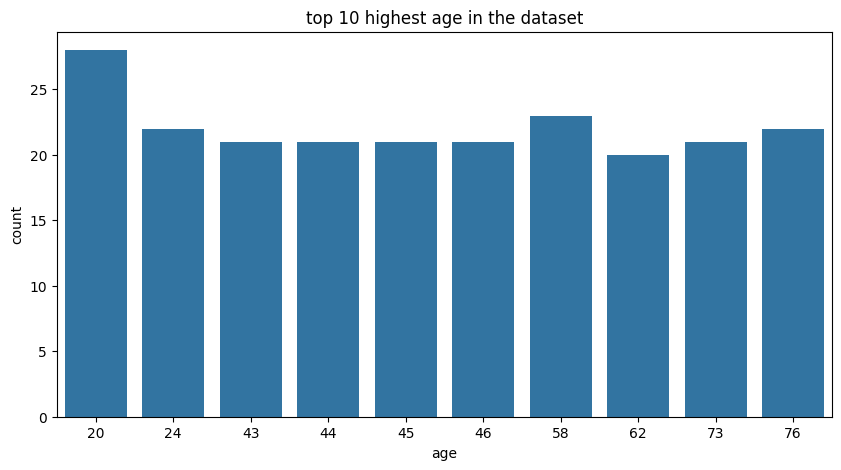

In [57]:
## top 10 highest age in the dataset
plt.figure(figsize=(10,5))
sns.barplot(x=df['age'].value_counts()[:10].index,y=df['age'].value_counts()[:10].values)
plt.title('top 10 highest age in the dataset')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

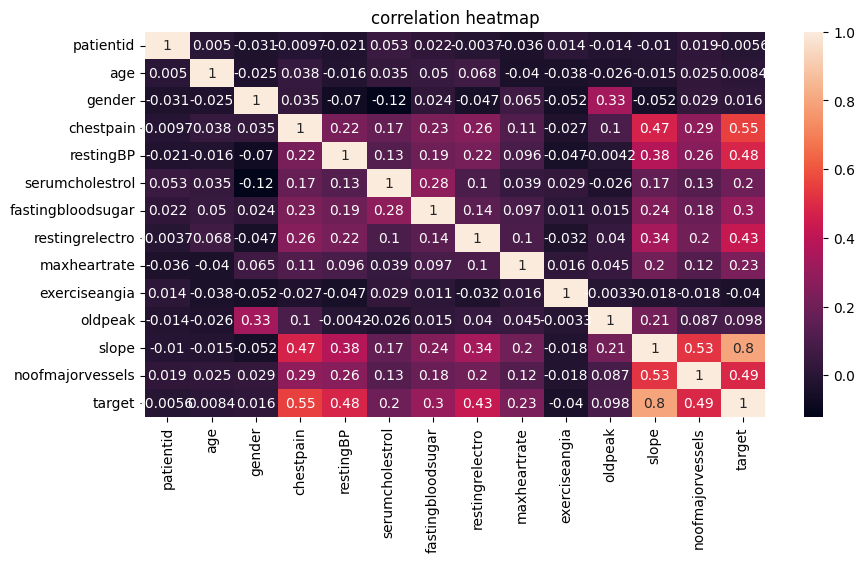

In [58]:
## correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.title('correlation heatmap')
plt.show()

In [59]:
## checking chest pain columns
chest_pain_count=df['chestpain'].value_counts()
print(chest_pain_count)

chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64


<ipython-input-60-1178697985>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['chestpain'].value_counts().index,y=df['chestpain'].value_counts().values,palette=colors)


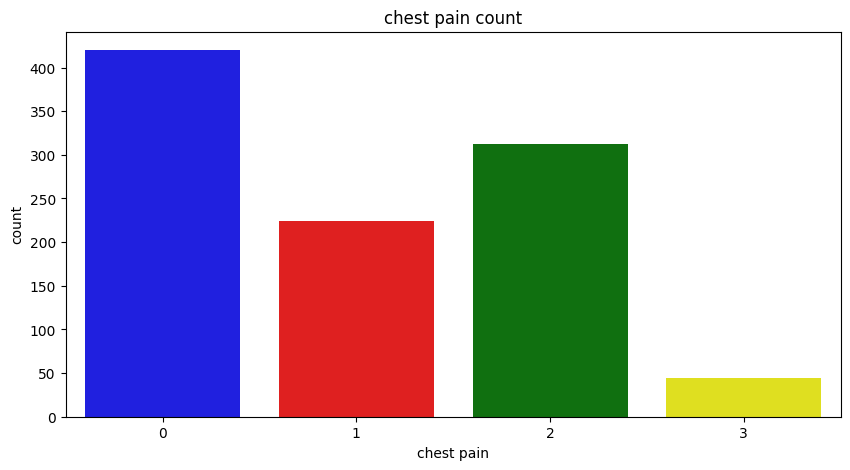

In [60]:
plt.figure(figsize=(10,5))
colors=['blue','red','green','yellow']
sns.barplot(x=df['chestpain'].value_counts().index,y=df['chestpain'].value_counts().values,palette=colors)
plt.title('chest pain count')
plt.xlabel('chest pain')
plt.ylabel('count')
plt.show()

In [61]:
from __future__ import generator_stop
## count of male and female
generator_stop=df['gender'].value_counts()
print("\n total number of male and female")
print(f'male:{generator_stop[1]}')
print(f'female:{generator_stop[0]}')


 total number of male and female
male:765
female:235


<ipython-input-62-3699673831>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['gender'].value_counts().index,y=df['gender'].value_counts().values,palette=colors)


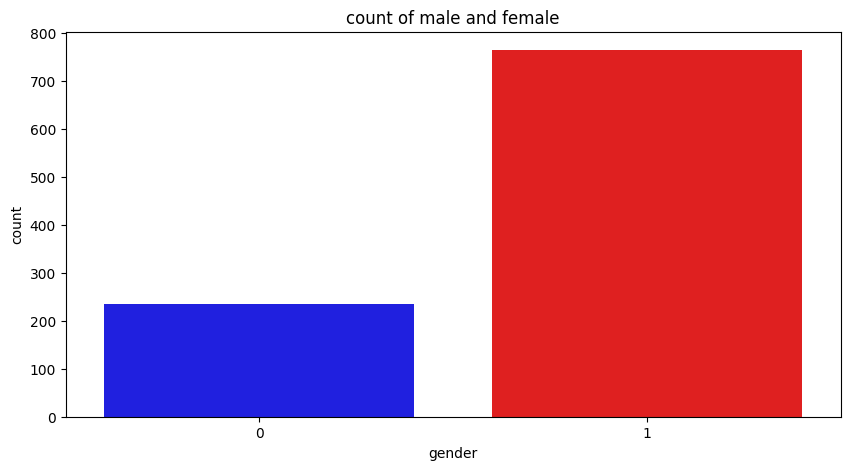

In [62]:
plt.figure(figsize=(10,5))
colors=['blue','red']
sns.barplot(x=df['gender'].value_counts().index,y=df['gender'].value_counts().values,palette=colors)
plt.title('count of male and female')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

target
1    580
0    420
Name: count, dtype: int64


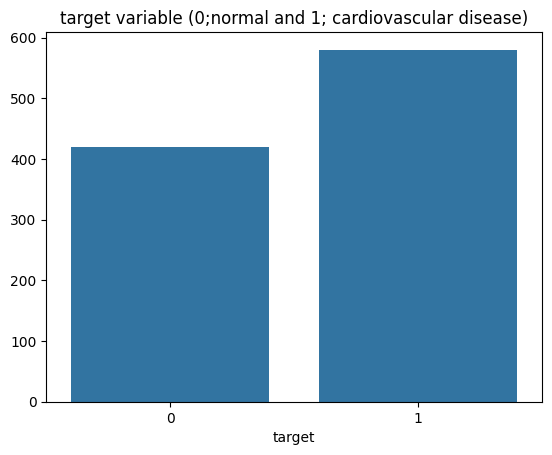

In [63]:
## target variable
target_count=df['target'].value_counts()
sns.barplot(x=df['target'].value_counts().index,y=df['target'].value_counts().values)
plt.title('target variable (0;normal and 1; cardiovascular disease)')
print(target_count)


## Data preprocessing

In [64]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [65]:
X= df.drop(columns=['target'])
y=df['target']

In [66]:
X

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2


In [67]:
y

,target
0,1
1,0
2,0
3,1
4,1
...,...
995,1
996,0
997,1
998,1


## splitting dataset into train (80%) and test (20%)
giving majority of the percentage to the train value so the model can train effectively on the dataset.

In [68]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

Supervised Machine learning models

1. Support vector machine
2. KNearest Neighbor
3. Naive Bayes
4. Logistic regression

In [69]:
svm= SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()
log = LogisticRegression()

In [70]:
knn = knn.fit(X_train, y_train)
nb = nb.fit(X_train, y_train)
log = log.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
KNN_pred = knn.predict(X_test)
NB_pred = nb.predict(X_test)
LOG_pred = log.predict(X_test)

In [72]:
print (KNN_pred)

print ('==================================')

print (NB_pred)

print ('==================================')

print (LOG_pred)

[0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1]
[1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1
 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1]
[1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0

Supervised Machine learning Accuracy

In [73]:
print (f'KNN accuracy: {accuracy_score(y_test, KNN_pred)}')
print (f'NB accuracy: {accuracy_score(y_test, NB_pred)}')
print (f'LOG accuracy: {accuracy_score(y_test, LOG_pred)}')

KNN accuracy: 0.515
NB accuracy: 0.81
LOG accuracy: 0.675


In [74]:
print(y_train.value_counts())

target
1    463
0    337
Name: count, dtype: int64


In [75]:
model = SVC(class_weight='balanced')
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
model.fit(X_resampled, y_resampled)
SVC_pred = model.predict(X_test)
print (f'SVC accuracy: {accuracy_score(y_test, SVC_pred)}')

SVC accuracy: 0.55


Model Evaluation

Classification Report for SVC model:
               precision    recall  f1-score   support

           0       0.47      0.61      0.53        83
           1       0.65      0.50      0.57       117

    accuracy                           0.55       200
   macro avg       0.56      0.56      0.55       200
weighted avg       0.57      0.55      0.55       200

Confusion Matrix for SVC model:
 [[51 32]
 [58 59]]


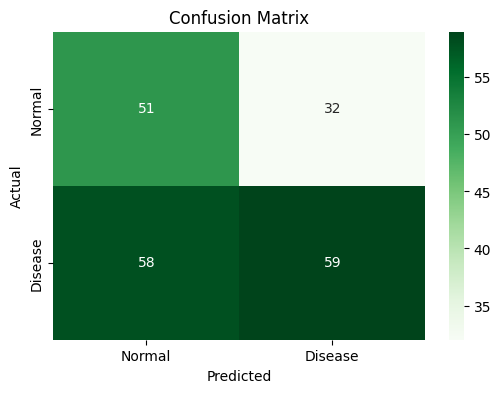

In [76]:
print("Classification Report for SVC model:\n", classification_report(y_test, SVC_pred))
conf_matrix = confusion_matrix(y_test, SVC_pred)
print("Confusion Matrix for SVC model:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Disease'], yticklabels=['Normal', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

classification report of KNN:
               precision    recall  f1-score   support

           0       0.39      0.29      0.33        83
           1       0.57      0.68      0.62       117

    accuracy                           0.52       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.50      0.52      0.50       200

[[24 59]
 [38 79]]


Text(0.5, 1.0, 'confusion matrix of KNN')

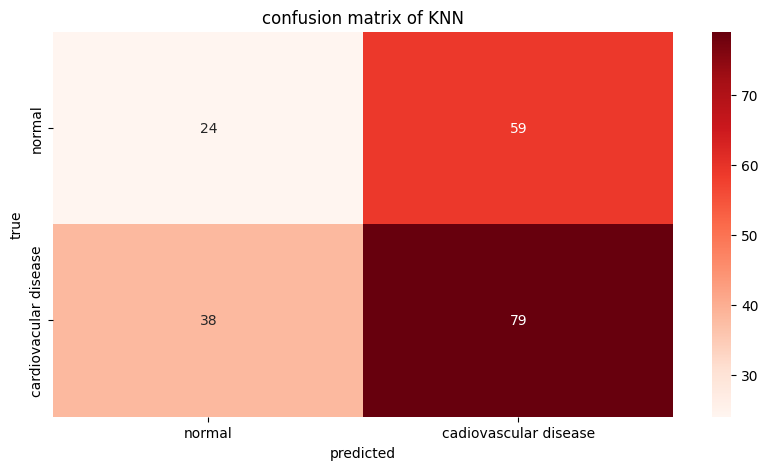

In [77]:
print (f'classification report of KNN:\n {classification_report(y_test, KNN_pred)}')
con_matrix = confusion_matrix(y_test, KNN_pred)
print (con_matrix)

#plot confusion graph
plt.figure(figsize=(10,5))
sns.heatmap(con_matrix, annot=True, fmt='d',cmap='Reds',xticklabels=['normal','cadiovascular disease'], yticklabels=['normal','cardiovacular disease'])
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix of KNN')

classification report of NB:
               precision    recall  f1-score   support

           0       0.84      0.67      0.75        83
           1       0.80      0.91      0.85       117

    accuracy                           0.81       200
   macro avg       0.82      0.79      0.80       200
weighted avg       0.81      0.81      0.81       200

[[ 56  27]
 [ 11 106]]


Text(0.5, 1.0, 'confusion matrix of NB')

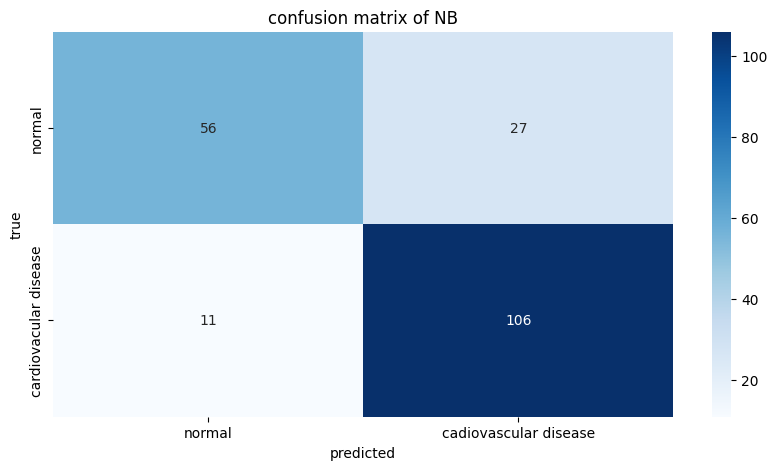

In [78]:
print (f'classification report of NB:\n {classification_report(y_test, NB_pred)}')
con_matrix = confusion_matrix(y_test, NB_pred)
print (con_matrix)

##plot confusion graph
plt.figure(figsize=(10,5))
sns.heatmap(con_matrix, annot=True, fmt='d',cmap='Blues',xticklabels=['normal','cadiovascular disease'], yticklabels=['normal','cardiovacular disease'])
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix of NB')

classification report of LOG:
               precision    recall  f1-score   support

           0       0.69      0.40      0.50        83
           1       0.67      0.87      0.76       117

    accuracy                           0.68       200
   macro avg       0.68      0.63      0.63       200
weighted avg       0.68      0.68      0.65       200

[[ 33  50]
 [ 15 102]]


Text(0.5, 1.0, 'confusion matrix of LOG')

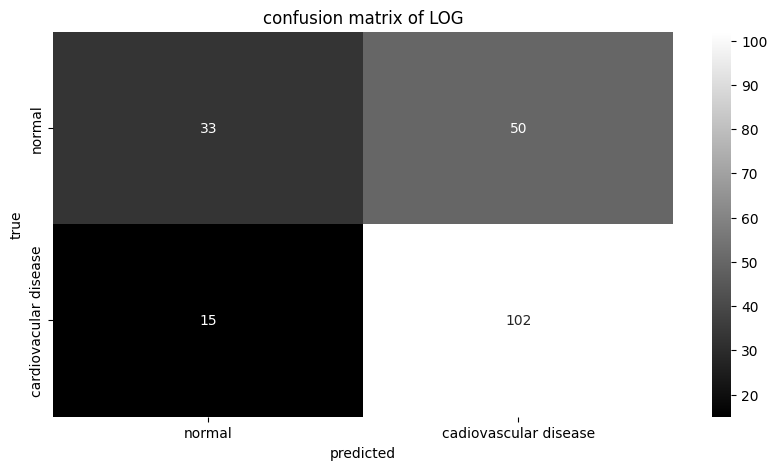

In [79]:
print(f'classification report of LOG:\n {classification_report(y_test, LOG_pred)}')
con_matrix=con_matrix = confusion_matrix(y_test, LOG_pred)
print (con_matrix)

##plot confusion graph
plt.figure(figsize=(10,5))
sns.heatmap(con_matrix, annot=True, fmt='d',cmap='grey',xticklabels=['normal','cadiovascular disease'], yticklabels=['normal','cardiovacular disease'])
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix of LOG')

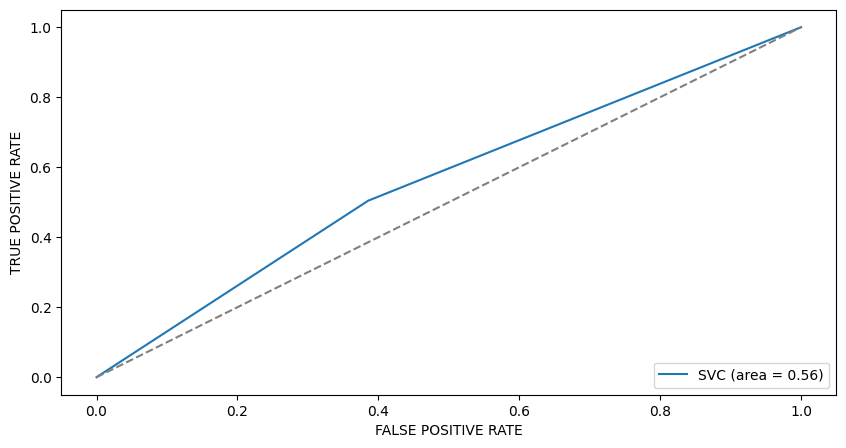

In [80]:
roc_auc = roc_auc_score(y_test, SVC_pred)
fpr, tpr, _=roc_curve(y_test, SVC_pred)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend(loc=4)
plt.show()

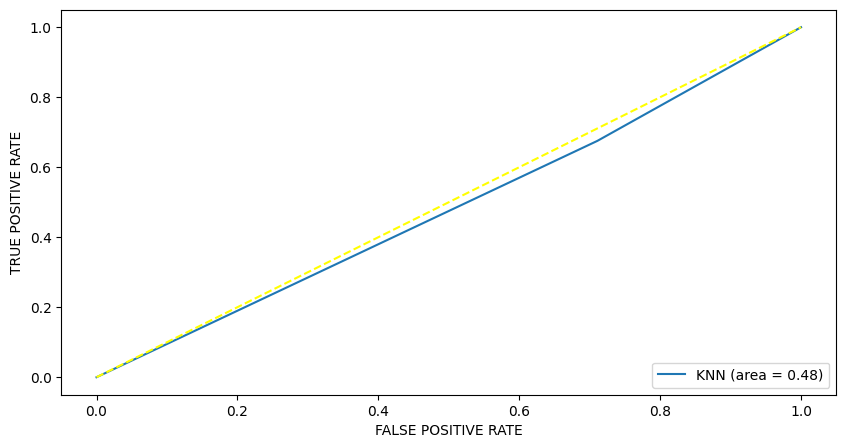

In [81]:
roc_auc = roc_auc_score(y_test, KNN_pred)
fpr, tpr, _=roc_curve(y_test, KNN_pred)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='Yellow')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend(loc=4)
plt.show()

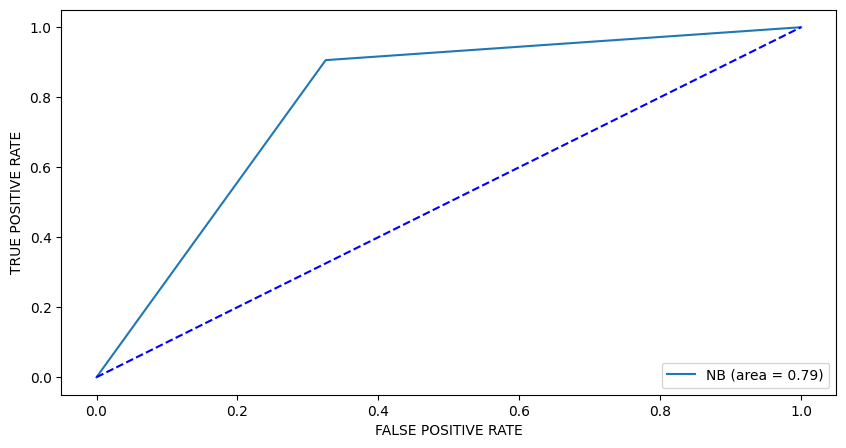

In [82]:
roc_auc = roc_auc_score(y_test, NB_pred)
fpr, tpr, _=roc_curve(y_test, NB_pred)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='Blue')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend(loc=4)
plt.show()

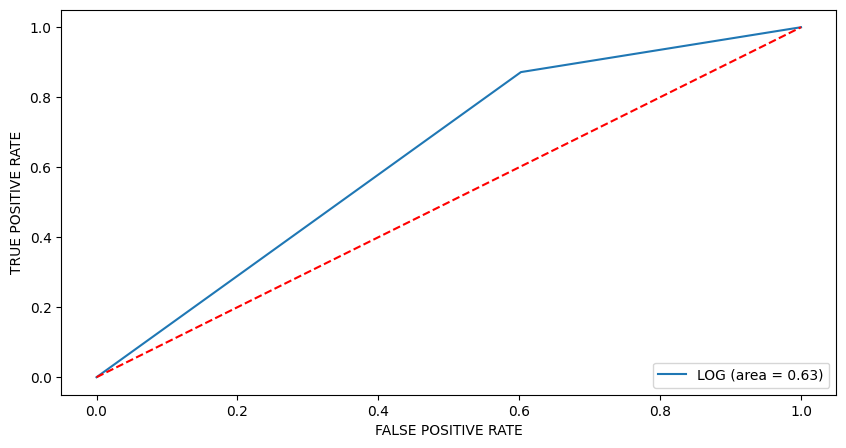

In [83]:
roc_auc = roc_auc_score(y_test, LOG_pred)
fpr, tpr, _=roc_curve(y_test, LOG_pred)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='LOG (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='Red')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend(loc=4)
plt.show()

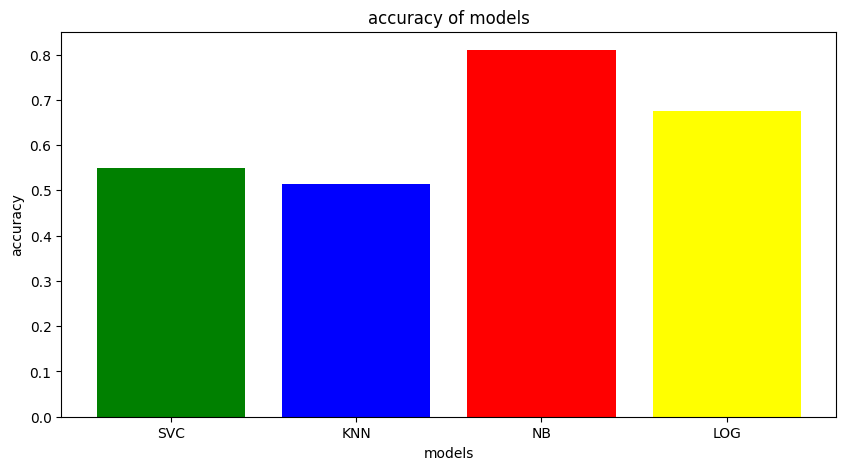

In [84]:
models=['SVC','KNN','NB','LOG']
colors=['green','blue','red','yellow']
accuracy=[accuracy_score(y_test, SVC_pred),accuracy_score(y_test, KNN_pred),accuracy_score(y_test, NB_pred),accuracy_score(y_test, LOG_pred)]
plt.figure(figsize=(10,5))
plt.bar(models,accuracy,color=colors)
plt.xlabel('models')
plt.ylabel('accuracy')
plt.title('accuracy of models')
plt.show()

Ensemble Model

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)

In [87]:
from sklearn.ensemble import BaggingClassifier

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
base_classifier=DecisionTreeClassifier()
bc= BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bc.fit(X_train,y_train)
y_pred_bc=bc.predict(X_test)

In [90]:
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

In [91]:
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()

## creating list classifiers and a meta classifier
stacking = StackingClassifier(classifiers=[clf1,clf2], meta_classifier=clf2)
stacking.fit(X_train,y_train)
y_pred_stacking=stacking.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
